In [45]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kb_python.utils import import_matrix_as_anndata
from sklearn.linear_model import LinearRegression
from upsetplot import from_contents, from_indicators
from upsetplot import plot as upset
from scipy.stats import ttest_ind_from_stats
import anndata 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mx.mx_inspect import mx_inspect_rows, mx_inspect_cols
import muon
fsize = 12.5
import sys

def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, c="k", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax


plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [109]:
kbmu = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/cr_peaks_cr_genes_kb_quant.h5mu")
crmu = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/cr_peaks_cr_genes_cr_quant.h5mu")

# cellranger removes the version from the gene ids for some reason
tmp =  kbmu.mod["gene"].copy()
tmp.var.index = tmp.var.index.map(lambda x: x.split(".")[0])
kbmu = muon.MuData({"gene":tmp.copy(), "atac": kbmu.mod["atac"].copy()})

muon.pp.intersect_obs(kbmu)
muon.pp.intersect_obs(crmu)

common_obs = np.intersect1d(kbmu.obs.index.values, crmu.obs.index.values)
common_var = np.intersect1d(kbmu.var.index.values, crmu.var.index.values)

kb = kbmu[common_obs].copy()[:,common_var].copy()
cr = crmu[common_obs].copy()[:,common_var].copy()

In [101]:
print(kb.mod["gene"].shape,
      cr.mod["gene"].shape,
      kb.mod["atac"].shape,
      cr.mod["atac"].shape,
      sep="\n")

(604162, 36601)
(604162, 36601)
(604162, 119451)
(604162, 119451)


In [111]:
co = 1e3

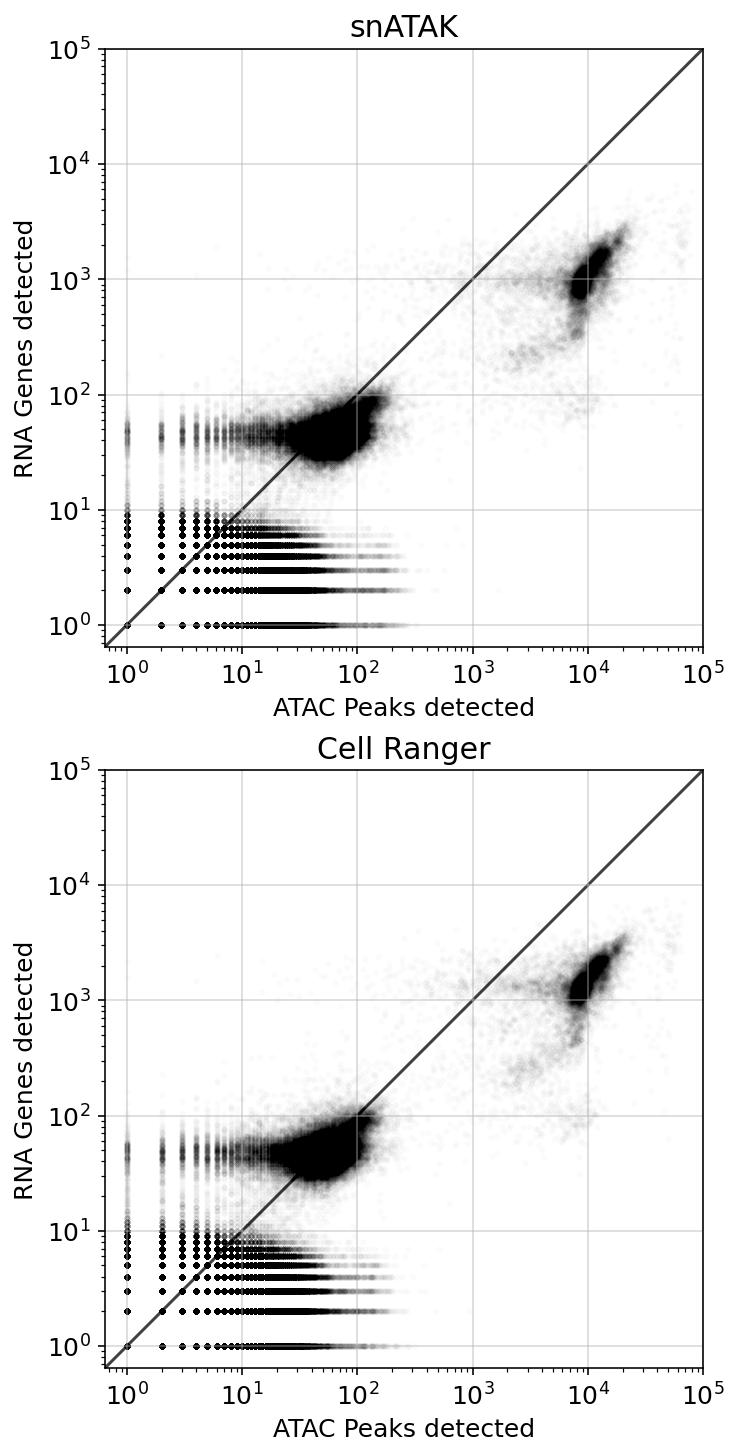

In [113]:
fig, axs = plt.subplots(figsize=(5,10), nrows=2, constrained_layout=True)

ax = axs[0]
x = kb.obs["atac:counts_nnzero"]
y = kb.obs["gene:counts_nnzero"]

ax.scatter(x,y, s=5, alpha=0.01, color="k")

ax.set(**{
    "title": "snATAK",
    "xlabel": "ATAC Peaks detected",
    "ylabel": "RNA Genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (1e1, 1e5)
})
yex(ax)
ax.grid(which="major", alpha=0.5)

ax = axs[1]
x = cr.obs["atac:counts_nnzero"]
y = cr.obs["gene:counts_nnzero"]

ax.scatter(x,y, s=5, alpha=0.01, color="k")

ax.set(**{
    "title": "Cell Ranger",
    "xlabel": "ATAC Peaks detected",
    "ylabel": "RNA Genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (1e1, 1e5)
})
ax.grid(which="major", alpha=0.5)
yex(ax)
fig.savefig("figures/10x_pbmc_mome-x_cmp.png", bbox_inches="tight", dpi=300)
fig.show()

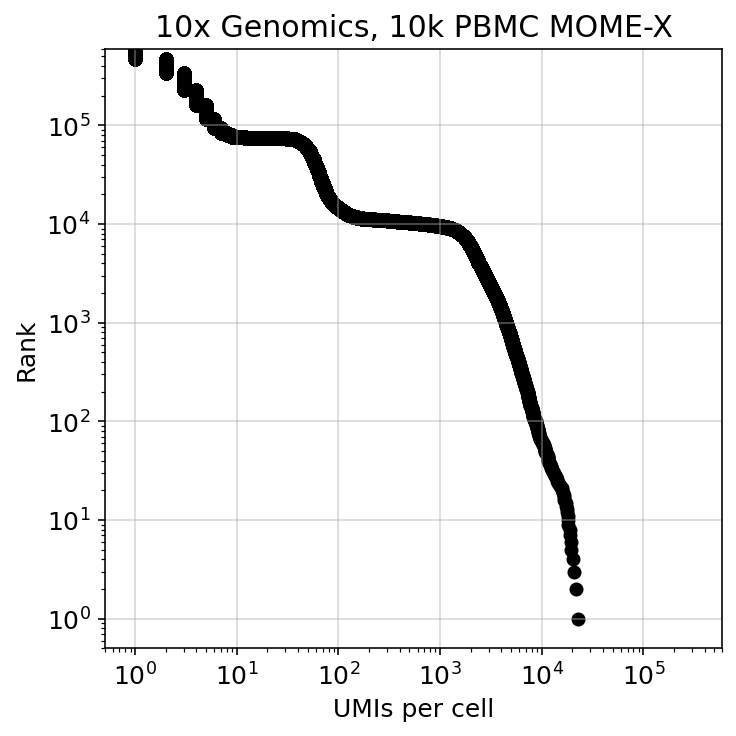

In [108]:
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)

x = kb.obs["gene:counts_sum"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, c="k")

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "UMIs per cell",
    "ylabel": "Rank",
    "title": "10x Genomics, 10k PBMC MOME-X",
    "xlim": (0.5, 6e5),
    "ylim": (0.5, 6e5)
})
ax.grid(alpha=0.5)
fig.savefig("figures/momex_kneeplot.png", bbox_inches="tight", dpi=300)
fig.show()